# MAT281 - Laboratorio N°03



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categóricas a numéricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [3]:
# Filtramos el dataframe por numericas
df_num = df[['desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']]
# las casillas vacias las llenamos con el promedio de la columna
valores_nah = SimpleImputer(strategy='mean')
valores_nah.fit(df_num)
df_num= pd.DataFrame(valores_nah.fit_transform(df_num))
# Renombramos name columns
df_num = df_num.rename(columns={ 0: 'desplazamiento', 1: 'cilindros', 2: 'co2' , 3: 'consumo_litros_milla'})
# Normalizamos 
scaler = MinMaxScaler()
columns = df_num.columns
df_num[columns] = scaler.fit_transform(df_num[columns])

df_num.head()

,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.243590,0.142857,0.398014,0.331027
1,0.461538,0.285714,0.527672,0.475113
2,0.243590,0.142857,0.424351,0.360294
3,0.461538,0.285714,0.527672,0.475113
4,0.410256,0.285714,0.424351,0.360294


In [4]:
# Filtramos el dataframe por categóricas
df_cat = df[['year', 'clase_tipo', 'traccion_tipo', 'transmision_tipo', 'combustible_tipo', 'tamano_motor_tipo',
                 'consumo_tipo', 'co2_tipo']]
df_cat = pd.get_dummies(df_cat)
# Unimos ambos dataframes
df_clean = pd.merge(df_num.reset_index(), df_cat.reset_index(), on='index', how='left')
df_clean = df_clean.drop(['index'],axis=1)

df_clean.head()

,desplazamiento,cilindros,co2,consumo_litros_milla,year,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.243590,0.142857,0.398014,0.331027,1984,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.461538,0.285714,0.527672,0.475113,1984,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.243590,0.142857,0.424351,0.360294,1985,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.461538,0.285714,0.527672,0.475113,1985,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.410256,0.285714,0.424351,0.360294,1987,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [5]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_clean)
centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_           # clusters

In [6]:
# Etiquetar los datos con los clusters
centroids_df = pd.DataFrame(centroids, columns=list(df_clean.columns))
df_clean['cluster'] = clusters
df_clean['cluster'] = df_clean['cluster'].astype('category')

In [7]:
centroids_df['cluster'] = [1,2,3,4,5,6,7,8]
for i in range(0,8):
    print('Media de variables numéricas del cluster', i+1)
    print(df_clean[df_clean['cluster']==i].drop(list(df_clean.columns[4:]), axis=1).mean())
    print('')
    print('Moda de variables numéricas del cluster', i+1)
    print(df_clean[df_clean['cluster']==i].drop(list(df_clean.columns[4:]), axis=1).mode())
    print('\n -------------------------------- \n')

Media de variables numéricas del cluster 1
desplazamiento          0.336339
cilindros               0.250937
co2                     0.378917
consumo_litros_milla    0.307841
dtype: float64

Moda de variables numéricas del cluster 1
   desplazamiento  cilindros       co2  consumo_litros_milla
0         0.24359   0.142857  0.374603              0.305011

 -------------------------------- 

Media de variables numéricas del cluster 2
desplazamiento          0.369496
cilindros               0.282055
co2                     0.334626
consumo_litros_milla    0.260714
dtype: float64

Moda de variables numéricas del cluster 2
   desplazamiento  cilindros       co2  consumo_litros_milla
0        0.179487   0.285714  0.317749               0.24183

 -------------------------------- 

Media de variables numéricas del cluster 3
desplazamiento          0.336655
cilindros               0.264392
co2                     0.365518
consumo_litros_milla    0.294735
dtype: float64

Moda de variables numéric

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.


In [8]:
n_clu = [5, 10, 20, 30, 50, 75, 100, 200, 300]
kmeans = [KMeans(n_clusters=i) for i in n_clu]
score = [kmeans[i].fit(df_clean).inertia_ for i in range(len(kmeans))]
df_Elbow = pd.DataFrame({'Number of Clusters':n_clu, 'Score':score})

df_Elbow

,Number of Clusters,Score
0,5,417539.035446
1,10,202405.416110
2,20,166250.865981
3,30,150044.271273
4,50,126833.941109
5,75,107493.462206
6,100,96779.684352
7,200,77615.522490
8,300,66616.248053


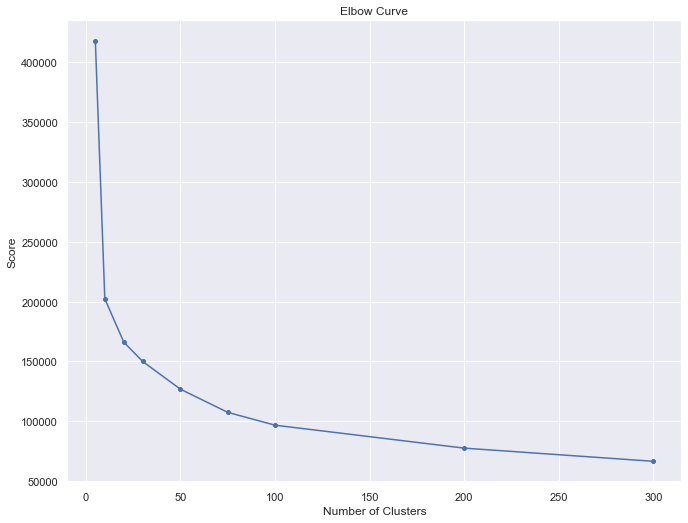

In [9]:
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

Es recomendable a utilizar entre 10 a 20 clusters, puesto que a partir de ahi se empieza a estabilizar la curva.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

# EDA

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [11]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


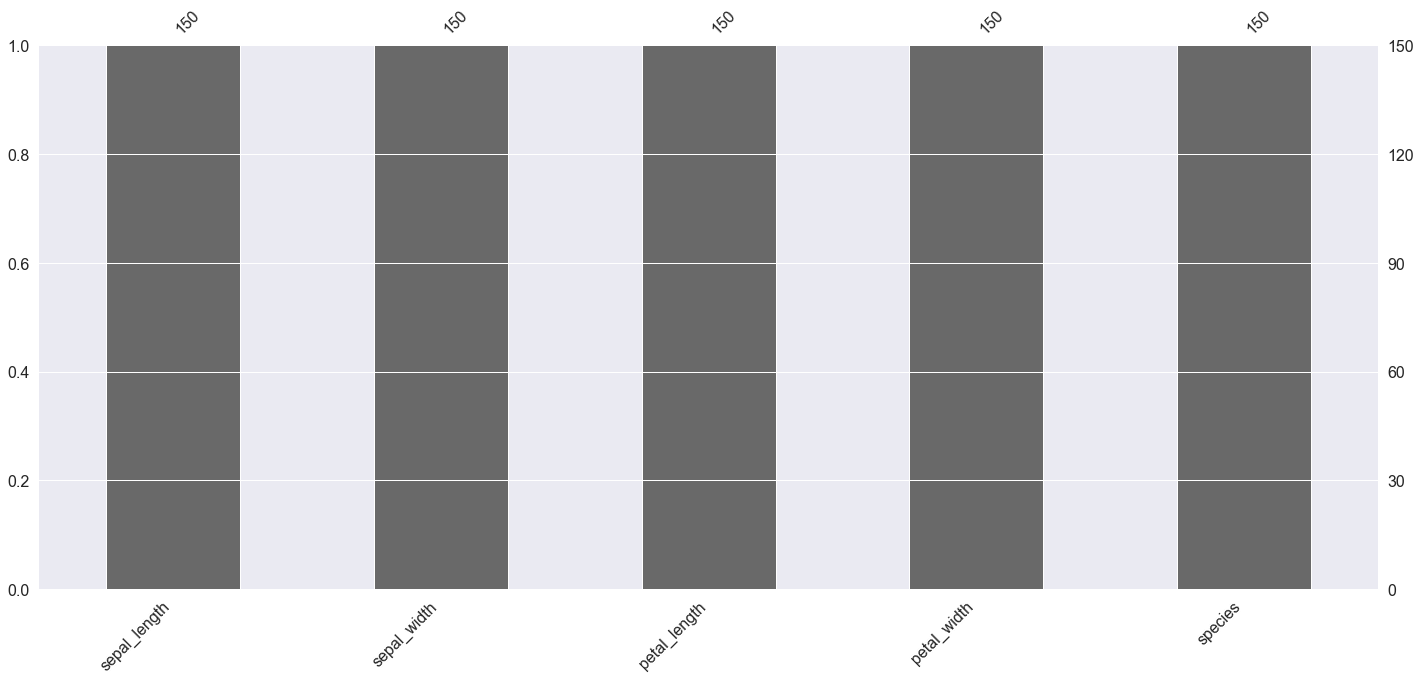

In [13]:
import missingno as msno # considerando los valores nulos de momento.
p=msno.bar(iris)

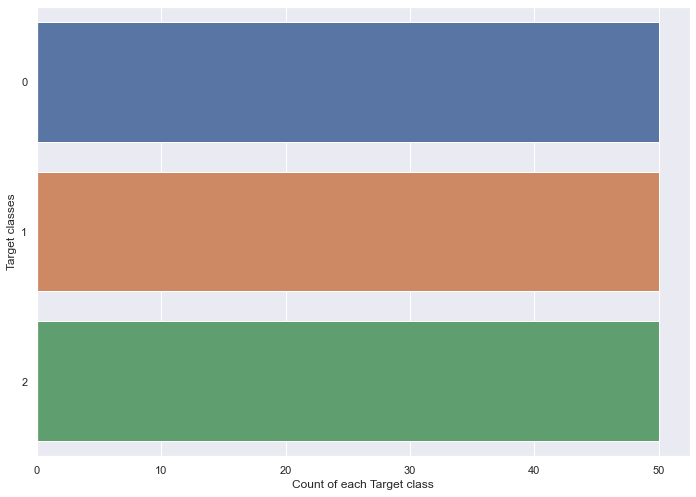

In [14]:
sns.countplot(y=iris.species ,data=iris)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

Notese que los datos estan bien distribuidos, 50 de cada uno.

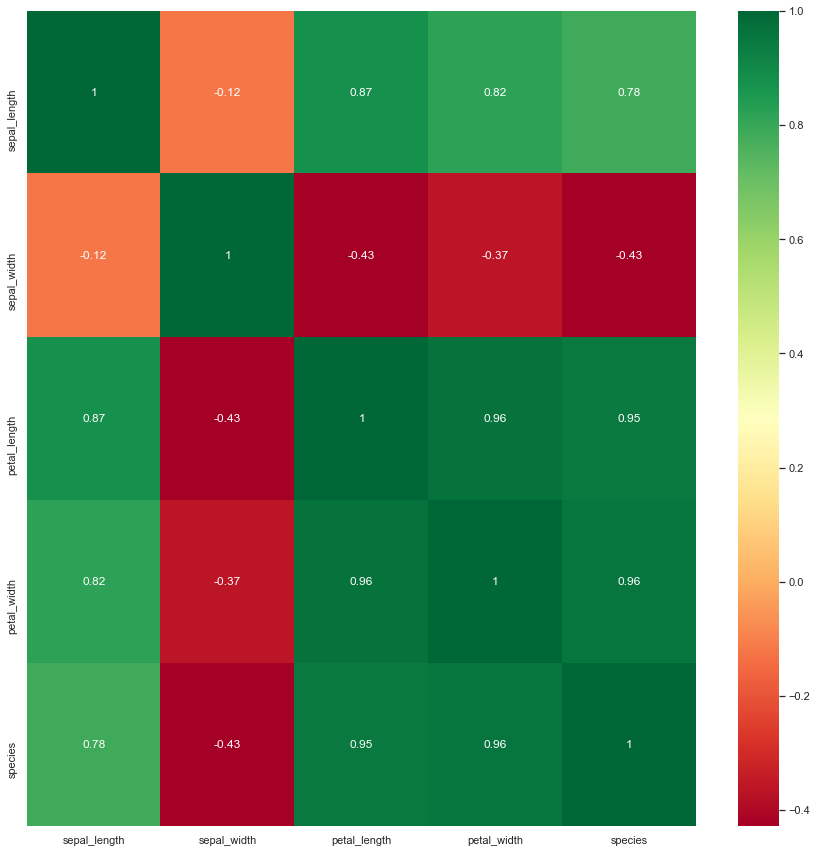

In [15]:
plt.figure(figsize=(15,15))
p=sns.heatmap(iris.corr(), annot=True,cmap='RdYlGn') 

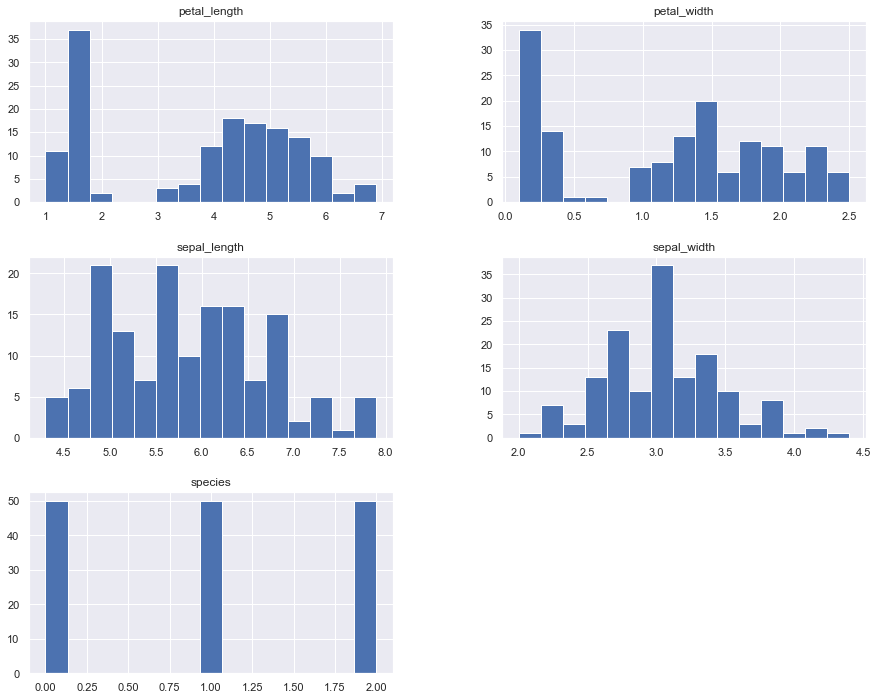

In [16]:
iris.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [17]:
X = iris.drop(['species'],axis=1)
y = iris['species']

In [18]:
pca = PCA()
X_new = pca.fit_transform(X)
pca.get_covariance()

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [19]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

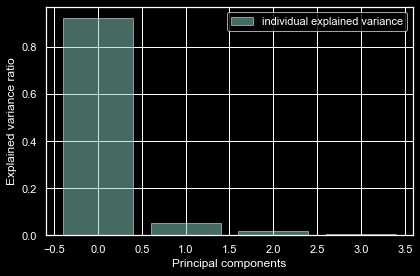

In [20]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## PCA con 2 componentes

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# PCA
scaler = StandardScaler()

X = iris.drop(columns=['species'])
y = iris['species']

    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['species'] = y

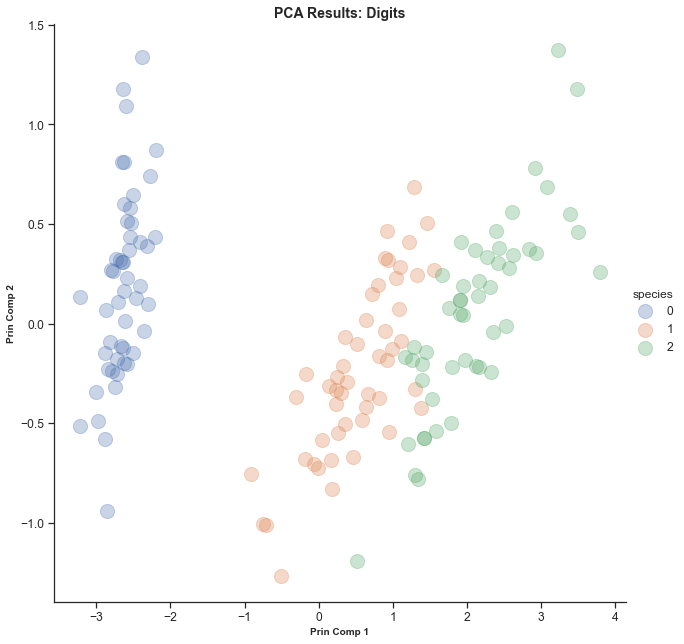

In [22]:
# Plot Digits PCA
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

# TSNE

In [23]:
# tsne
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']
    
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['species'] = y

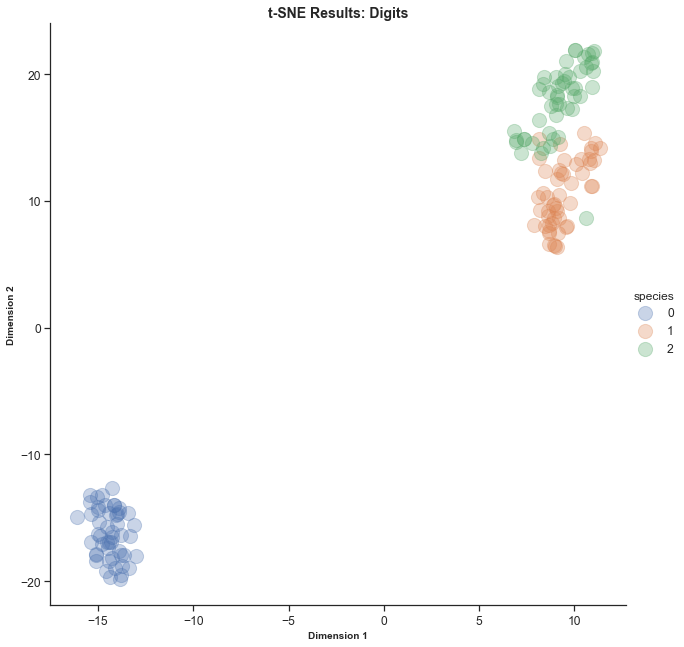

In [24]:
# Plot Digits t-SNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

Podemos notar via grafico que la mejor opcion a realizar es TSNE puesto que distribuye d emejor forma las clases en cuestion al reducir la dimensionalidad de los atributos por cada especie.